In [6]:
# Load packages
import os
import pandas as pd
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates
from tqdm import tqdm

# Advanced plotting functionality with seaborn
import seaborn as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

sns.set(style="whitegrid")  # can set style depending on how you'd like it to look

In [2]:
!pip install tqdm

    100% |████████████████████████████████| 71kB 1.4MB/s ta 0:00:01


## Import Dataframe

In [10]:
df = pd.read_csv('FimaNfipClaims.csv')

/Users/Sathya/anaconda3/envs/pyrecent/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,agricultureStructureIndicator,baseFloodElevation,basementEnclosureCrawlspace,policyCount,countyCode,communityRatingSystemDiscount,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,...,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence
count,2.502808e+06,585567.000000,713857.000000,2.502808e+06,2.455326e+06,1.588737e+06,2.502808e+06,578023.000000,659112.000000,2.351112e+06,...,1.840018e+06,939285.000000,56123.000000,2.502808e+06,2.502808e+06,2.502814e+06,2.502808e+06,2.502816e+06,2.440580e+06,2.502814e+06
mean,1.374456e-04,124.516076,1.324236,1.259933e+00,3.015804e+04,6.676741e+00,1.809040e-01,1.892878,1.404160,2.999560e+10,...,3.147473e+04,14560.209967,16231.283790,2.620565e-01,4.245631e-03,1.556541e+05,2.971225e+04,2.001152e+03,4.625142e+04,4.742865e-01
std,1.172292e-02,742.763056,1.040481,6.404347e+00,1.459976e+04,1.534905e+00,3.849387e-01,0.968600,17.660348,1.443308e+10,...,5.872708e+04,29681.015047,13108.641022,4.397533e-01,6.502006e-02,1.135776e+06,4.957434e+04,1.202988e+01,2.713016e+04,4.993385e-01
min,0.000000e+00,-9998.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000,-9989.000000,1.001020e+09,...,-1.622185e+05,-41276.320000,-30000.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.970000e+03,0.000000e+00,0.000000e+00
25%,0.000000e+00,6.000000,1.000000,1.000000e+00,2.201700e+04,5.000000e+00,0.000000e+00,1.000000,0.000000,2.200903e+10,...,2.991345e+03,1434.960000,0.000000,0.000000e+00,0.000000e+00,3.660000e+04,0.000000e+00,1.992000e+03,2.442600e+04,0.000000e+00
50%,0.000000e+00,9.000000,1.000000,1.000000e+00,2.916300e+04,7.000000e+00,0.000000e+00,1.000000,1.000000,2.911907e+10,...,1.043297e+04,5069.210000,15100.000000,0.000000e+00,0.000000e+00,9.620000e+04,1.100000e+04,2.004000e+03,3.956200e+04,0.000000e+00
75%,0.000000e+00,14.000000,2.000000,1.000000e+00,4.208100e+04,8.000000e+00,0.000000e+00,3.000000,3.000000,4.207500e+10,...,3.750869e+04,15949.710000,30000.000000,1.000000e+00,0.000000e+00,2.000000e+05,4.020000e+04,2.011000e+03,7.045800e+04,1.000000e+00
max,1.000000e+00,9998.000000,4.000000,1.090000e+03,7.803000e+04,1.000000e+01,1.000000e+00,4.000000,998.000000,7.803096e+10,...,1.000000e+07,750000.000000,60000.000000,1.000000e+00,1.000000e+00,2.439030e+08,6.000000e+06,2.020000e+03,9.999900e+04,1.000000e+00


In [11]:
df.columns

Index(['agricultureStructureIndicator', 'asOfDate', 'baseFloodElevation',
       'basementEnclosureCrawlspace', 'reportedCity', 'condominiumIndicator',
       'policyCount', 'countyCode', 'communityRatingSystemDiscount',
       'dateOfLoss', 'elevatedBuildingIndicator',
       'elevationCertificateIndicator', 'elevationDifference', 'censusTract',
       'floodZone', 'houseWorship', 'latitude', 'longitude',
       'locationOfContents', 'lowestAdjacentGrade', 'lowestFloorElevation',
       'numberOfFloorsInTheInsuredBuilding', 'nonProfitIndicator',
       'obstructionType', 'occupancyType', 'originalConstructionDate',
       'originalNBDate', 'amountPaidOnBuildingClaim',
       'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim',
       'postFIRMConstructionIndicator', 'rateMethod',
       'smallBusinessIndicatorBuilding', 'state',
       'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage',
       'yearOfLoss', 'reportedZipcode', 'primaryReside

In [36]:
df

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,...,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
0,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,TRENTON,N,1.0,34021.0,NaN,1996-06-12T04:00:00.000Z,...,0.0,1,0.0,NJ,125300.0,5000.0,1996,8638.0,1.0,5fc65baef54611084d40e682
1,0.0,2020-12-01T02:54:50.977Z,7.0,NaN,MARATHON,N,1.0,12087.0,6.0,2017-09-10T04:00:00.000Z,...,1.0,1,0.0,FL,250000.0,100000.0,2017,33050.0,0.0,5fc65baef54611084d40e6a6
2,0.0,2020-11-22T00:53:40.710Z,NaN,2.0,DETROIT,N,1.0,26163.0,8.0,2019-06-25T04:00:00.000Z,...,0.0,R,0.0,MI,250000.0,100000.0,2019,48215.0,1.0,5fc65baef54611084d40e676
3,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,DES ARC,N,1.0,5117.0,NaN,2011-05-02T04:00:00.000Z,...,0.0,1,0.0,AR,34500.0,0.0,2011,72040.0,1.0,5fc65baef54611084d40e677
4,0.0,2020-11-22T00:53:40.710Z,NaN,2.0,DETROIT,N,1.0,26163.0,8.0,2014-08-11T04:00:00.000Z,...,0.0,Q,0.0,MI,250000.0,100000.0,2014,48215.0,1.0,5fc65baef54611084d40e688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502811,0.0,2020-11-22T00:53:40.710Z,NaN,2.0,CAMBRIDGE,N,1.0,24019.0,6.0,2003-09-18T04:00:00.000Z,...,0.0,1,0.0,MD,78000.0,0.0,2003,21613.0,0.0,5fc65dd3f54611084d671744
2502812,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,Cata�o,N,1.0,72033.0,NaN,2017-09-20T04:00:00.000Z,...,0.0,1,0.0,PR,130700.0,0.0,2017,962.0,1.0,5fc65dd3f54611084d67173b
2502813,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,ASHLAND,N,1.0,31155.0,NaN,1993-07-16T04:00:00.000Z,...,0.0,1,0.0,NE,29000.0,0.0,1993,68003.0,0.0,5fc65dd3f54611084d671736
2502814,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,MOUNT BETHEL,N,1.0,42095.0,NaN,2006-06-28T04:00:00.000Z,...,0.0,1,0.0,PA,75000.0,23000.0,2006,18343.0,1.0,5fc65dd3f54611084d67173d


## Cleaning

2502814

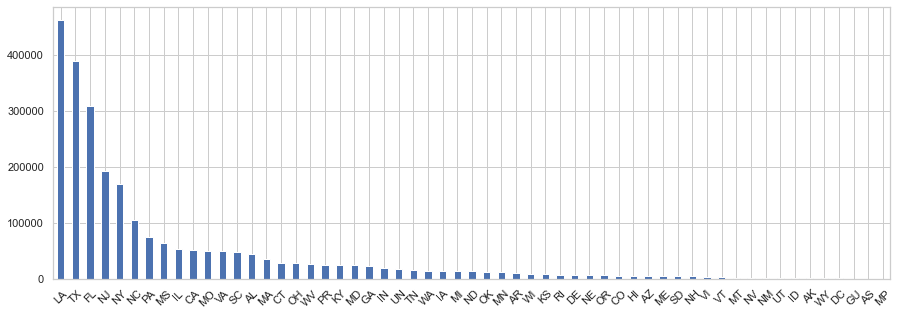

In [41]:
fig, ax = plt.subplots(figsize=(15,5))
df['state'].value_counts().plot(ax=ax, kind='bar')
ax.tick_params(axis='x', rotation=45)
sum(df['state'].value_counts())
#ASSUMPTION: only two are nans, so we can filter by louisiana without risking losing too much
#data, not risking any 

In [40]:
louisiana = df[(df['yearOfLoss'].isin(range(2005, 2008))) & (df['state']=='LA')]
louisiana

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,...,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
421,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,MARRERO,N,1.0,22051.0,5.0,2007-10-22T04:00:00.000Z,...,0.0,7,0.0,LA,50000.0,50000.0,2007,70072.0,0.0,5fc65baef54611084d40e7ff
919,0.0,2020-11-22T00:53:40.710Z,3.0,NaN,KENNER,N,1.0,22051.0,6.0,2005-08-29T04:00:00.000Z,...,1.0,1,0.0,LA,163400.0,220500.0,2005,70062.0,0.0,5fc65baef54611084d40ea08
1345,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,HARAHAN,N,1.0,22051.0,8.0,2005-08-29T04:00:00.000Z,...,1.0,1,0.0,LA,200000.0,100000.0,2005,70123.0,0.0,5fc65baef54611084d40eb65
1447,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,SLIDELL,N,1.0,22103.0,7.0,2005-08-29T04:00:00.000Z,...,0.0,1,0.0,LA,117000.0,38600.0,2005,70458.0,0.0,5fc65baef54611084d40ec0f
2256,0.0,2020-11-22T00:53:40.710Z,NaN,0.0,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,...,0.0,7,0.0,LA,250000.0,100000.0,2005,70118.0,1.0,5fc65baff54611084d40ef57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502600,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,JEFFERSON,N,1.0,22051.0,5.0,2005-08-29T04:00:00.000Z,...,0.0,1,0.0,LA,100000.0,15700.0,2005,70121.0,1.0,5fc65dd3f54611084d671685
2502610,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,...,0.0,1,0.0,LA,91300.0,21000.0,2005,70126.0,1.0,5fc65dd3f54611084d671660
2502623,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,KENNER,N,1.0,22051.0,7.0,2005-08-29T04:00:00.000Z,...,0.0,1,0.0,LA,50000.0,10000.0,2005,70065.0,1.0,5fc65dd3f54611084d671686
2502642,0.0,2020-11-22T00:53:40.710Z,9.0,NaN,NEW IBERIA,N,1.0,22045.0,NaN,2005-09-24T04:00:00.000Z,...,0.0,1,0.0,LA,50000.0,0.0,2005,70560.0,1.0,5fc65dd3f54611084d6716ae


### Other Cleaning

In [67]:
#creating pandas-recognized datetime column and then filtering for within a few months of Katrina.

louisiana['dateTimeOfLoss'] = pd.to_datetime(louisiana['dateOfLoss'], infer_datetime_format=True)
louisiana_katrina = louisiana[(louisiana['dateTimeOfLoss'] > "2005-08-10") & (louisiana['dateTimeOfLoss'] < "2006-02-01")]

<ipython-input-67-0198c429ce64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisiana['dateTimeOfLoss'] = pd.to_datetime(louisiana['dateOfLoss'], infer_datetime_format=True)


In [77]:
pd.set_option('max_columns', None)
louisiana_katrina
#pd.reset_option('max_columns')

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,floodZone,houseWorship,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id,dateTimeOfLoss
919,0.0,2020-11-22T00:53:40.710Z,3.0,NaN,KENNER,N,1.0,22051.0,6.0,2005-08-29T04:00:00.000Z,0.0,NaN,0.0,2.205102e+10,AE,0.0,30.0,-90.3,3.0,0.0,3.0,1.0,0.0,NaN,4.0,1997-01-25T05:00:00.000Z,1997-07-25T04:00:00.000Z,96629.92,75000.00,NaN,1.0,1,0.0,LA,163400.0,220500.0,2005,70062,0.0,5fc65baef54611084d40ea08,2005-08-29 04:00:00+00:00
1345,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,HARAHAN,N,1.0,22051.0,8.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.205102e+10,X,0.0,30.0,-90.2,3.0,NaN,NaN,1.0,0.0,NaN,4.0,1975-06-01T04:00:00.000Z,1997-08-29T04:00:00.000Z,NaN,NaN,NaN,1.0,1,0.0,LA,200000.0,100000.0,2005,70123,0.0,5fc65baef54611084d40eb65,2005-08-29 04:00:00+00:00
1447,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,SLIDELL,N,1.0,22103.0,7.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.210304e+10,C,0.0,30.3,-89.8,3.0,NaN,NaN,1.0,0.0,NaN,1.0,1974-12-30T05:00:00.000Z,1997-07-25T04:00:00.000Z,117000.00,38600.00,NaN,0.0,1,0.0,LA,117000.0,38600.0,2005,70458,0.0,5fc65baef54611084d40ec0f,2005-08-29 04:00:00+00:00
2256,0.0,2020-11-22T00:53:40.710Z,NaN,0.0,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.207101e+10,X,0.0,30.0,-90.1,5.0,NaN,NaN,2.0,0.0,NaN,2.0,2040-01-01T05:00:00.000Z,1997-09-01T04:00:00.000Z,105036.03,10927.64,NaN,0.0,7,0.0,LA,250000.0,100000.0,2005,70118,1.0,5fc65baff54611084d40ef57,2005-08-29 04:00:00+00:00
2320,0.0,2020-11-22T00:53:40.710Z,NaN,0.0,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.207100e+10,X,0.0,30.0,-90.1,3.0,NaN,NaN,1.0,0.0,NaN,2.0,1950-01-01T05:00:00.000Z,1997-09-01T04:00:00.000Z,11432.97,NaN,NaN,0.0,7,0.0,LA,100000.0,40000.0,2005,70122,0.0,5fc65baff54611084d40ef89,2005-08-29 04:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502600,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,JEFFERSON,N,1.0,22051.0,5.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.205102e+10,AE,0.0,30.0,-90.2,3.0,NaN,NaN,1.0,0.0,NaN,1.0,2049-01-01T05:00:00.000Z,1999-06-05T04:00:00.000Z,NaN,NaN,NaN,0.0,1,0.0,LA,100000.0,15700.0,2005,70121,1.0,5fc65dd3f54611084d671685,2005-08-29 04:00:00+00:00
2502610,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.207100e+10,A07,0.0,30.0,-90.0,3.0,NaN,NaN,1.0,0.0,NaN,1.0,1956-07-01T04:00:00.000Z,2001-07-24T04:00:00.000Z,91300.00,21000.00,11040.0,0.0,1,0.0,LA,91300.0,21000.0,2005,70126,1.0,5fc65dd3f54611084d671660,2005-08-29 04:00:00+00:00
2502623,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,KENNER,N,1.0,22051.0,7.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.205102e+10,AE,0.0,30.0,-90.2,3.0,NaN,NaN,1.0,0.0,NaN,1.0,1959-01-11T05:00:00.000Z,2000-02-25T05:00:00.000Z,50000.00,10000.00,30000.0,0.0,1,0.0,LA,50000.0,10000.0,2005,70065,1.0,5fc65dd3f54611084d671686,2005-08-29 04:00:00+00:00
2502642,0.0,2020-11-22T00:53:40.710Z,9.0,NaN,NEW IBERIA,N,1.0,22045.0,NaN,2005-09-24T04:00:00.000Z,1.0,3.0,3.0,2.204503e+10,A,0.0,30.0,-91.9,4.0,8.6,12.0,2.0,0.0,10.0,1.0,1950-07-01T04:00:00.000Z,2002-05-16T04:00:00.000Z,NaN,NaN,NaN,0.0,1,0.0,LA,50000.0,0.0,2005,70560,1.0,5fc65dd3f54611084d6716ae,2005-09-24 04:00:00+00:00


In [72]:
#dropping all rows that have nas for reported zipcode (financial data) and then casting to int.
louisiana_katrina = louisiana_katrina.dropna(subset = ['reportedZipcode'])
louisiana_katrina['reportedZipcode'] = louisiana_katrina['reportedZipcode'].apply(lambda zipcode: int(zipcode))

In [73]:
louisiana_katrina.isna().sum()

agricultureStructureIndicator                      0
asOfDate                                           0
baseFloodElevation                            114602
basementEnclosureCrawlspace                   175762
reportedCity                                       3
condominiumIndicator                              13
policyCount                                        0
countyCode                                       164
communityRatingSystemDiscount                  26266
dateOfLoss                                         0
elevatedBuildingIndicator                          0
elevationCertificateIndicator                 146858
elevationDifference                            98228
censusTract                                     1228
floodZone                                       2183
houseWorship                                       0
latitude                                          15
longitude                                         15
locationOfContents                            

In [74]:
louisiana_katrina.to_csv('semiclean_katrina_louisiana_FIMA_NFIP.csv')

## EDA

In [7]:
louisiana_katrina = pd.read_csv('semiclean_katrina_louisiana_FIMA_NFIP.csv')
louisiana_katrina['dateTimeOfLoss'] = pd.to_datetime(louisiana_katrina['dateOfLoss'], infer_datetime_format=True)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
louisiana_katrina["dateTimeOfLoss"].sort_values()

107253   2005-08-11 04:00:00
69624    2005-08-12 04:00:00
186709   2005-08-15 04:00:00
18572    2005-08-15 04:00:00
130779   2005-08-18 04:00:00
118878   2005-08-18 04:00:00
113583   2005-08-18 04:00:00
166425   2005-08-18 04:00:00
159447   2005-08-19 04:00:00
40206    2005-08-19 04:00:00
132090   2005-08-19 04:00:00
127906   2005-08-19 04:00:00
134162   2005-08-19 04:00:00
149512   2005-08-19 04:00:00
183420   2005-08-19 04:00:00
141043   2005-08-20 04:00:00
2824     2005-08-20 04:00:00
9165     2005-08-20 04:00:00
154329   2005-08-20 04:00:00
10094    2005-08-20 04:00:00
140705   2005-08-21 04:00:00
17434    2005-08-21 04:00:00
158754   2005-08-22 04:00:00
179875   2005-08-22 04:00:00
183195   2005-08-22 04:00:00
180016   2005-08-22 04:00:00
180205   2005-08-22 04:00:00
179510   2005-08-22 04:00:00
180272   2005-08-22 04:00:00
134080   2005-08-22 04:00:00
                 ...        
183043   2005-11-10 05:00:00
185383   2005-11-14 05:00:00
128139   2005-11-16 05:00:00
130739   2005-

In [9]:
folium_map = folium.Map(location=[31.298430, -92.469646],
                        zoom_start=7,
                        tiles="Stamen Terrain")
#Now we can have a scatter plot of the first 1000 data points on the above map
'''for _, listings in tqdm(louisiana_katrina.iterrows()):
    if np.isnan(listings['latitude']):
        continue
    marker = folium.CircleMarker(location=[listings["latitude"],listings["longitude"]],radius=5,color="r",fill=True)
    marker.add_to(folium_map)'''



folium_map.add_child(FastMarkerCluster(louisiana_katrina[~(louisiana_katrina['latitude'].isna())][['latitude', 'longitude']].values.tolist()))


folium_map

In [23]:
counts = louisiana_katrina.copy()
counts['count'] = 1
counts = counts.groupby(['reportedZipcode']).count()['count'].reset_index().set_index('reportedZipcode')
counts = counts.sort_values(by='reportedZipcode')
counts

,count
reportedZipcode,
70000,2
70001,5510
70002,4450
70003,8433
70004,4
70005,4788
70006,4686
70009,26
70010,3


In [ ]:
counts.to_csv('LA_NFIP_claims_counts.csv')